In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
import gradio as gr


In [ ]:
# Load MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

In [ ]:
# Split dataset into 60,000 train and 10,000 test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=60000, test_size=10000, stratify=y, random_state=42)


In [ ]:
# SGD Classifier with hinge loss (SVM-like)
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)
print("SGDClassifier Accuracy:", sgd_clf.score(X_test, y_test))

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))


SGDClassifier Accuracy: 0.8856
Random Forest Accuracy: 0.9683


In [ ]:
# Evaluate Random Forest
y_pred = rf_clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       986
           1       0.99      0.99      0.99      1125
           2       0.97      0.97      0.97       999
           3       0.96      0.95      0.96      1020
           4       0.97      0.96      0.97       975
           5       0.97      0.96      0.96       902
           6       0.97      0.99      0.98       982
           7       0.97      0.97      0.97      1042
           8       0.96      0.95      0.96       975
           9       0.94      0.95      0.94       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
 [[ 976    1    1    0    1    0    4    0    3    0]
 [   0 1109    4    3    1    3    2    2    1    0]
 [   5    1  971    4    4    1    2    6    4    1]
 [   1    0   12  973    0   10    1  

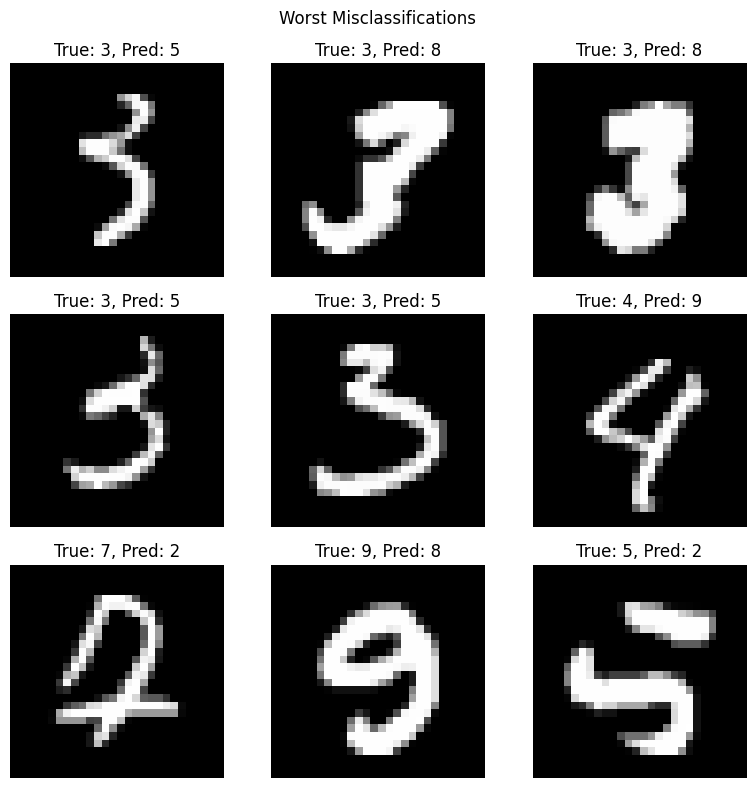

In [ ]:
# Show 9 worst misclassified digits
misclassified_indices = np.where(y_pred != y_test)[0]
worst = misclassified_indices[:9]

plt.figure(figsize=(8, 8))
for i, idx in enumerate(worst):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis("off")
plt.suptitle("Worst Misclassifications")
plt.tight_layout()
plt.show()


In [ ]:
import gradio as gr
import numpy as np
from PIL import Image

def predict_digit(image):
    image = Image.fromarray(image).convert("L").resize((28, 28))
    image = 255 - np.array(image)  # Invert: black digit on white bg
    image = image.reshape(1, -1) / 255.0
    prediction = rf_clf.predict(image)
    return str(prediction[0])

interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="numpy"),
    outputs="label",
    title="MNIST Digit Recognizer",
    description="Draw a digit (0–9) and let the Random Forest model predict it!"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://61d91fb6117506b4ac.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


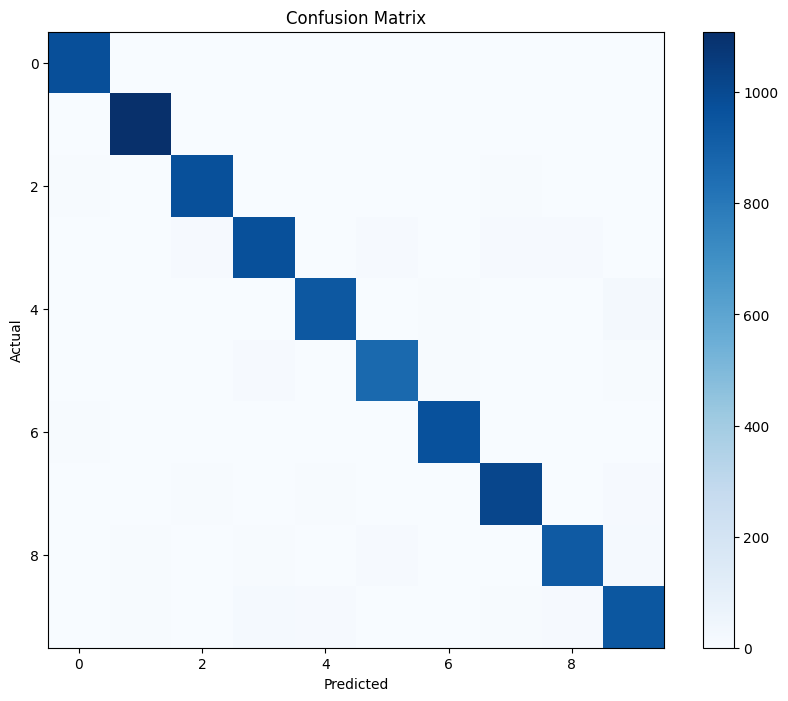

Top 3 misclassifications: [((np.uint8(4), np.uint8(9)), 25), ((np.uint8(8), np.uint8(9)), 15), ((np.uint8(9), np.uint8(3)), 14)]


In [18]:
#Error Analysis Report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred = rf_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# Get most common misclassifications
errors = (y_test != y_pred)
X_errors = X_test[errors]
y_errors = y_test[errors]
y_pred_errors = y_pred[errors]

# Count most frequent misclassified pairs
from collections import Counter
confused_pairs = Counter(list(zip(y_errors, y_pred_errors)))
most_common_errors = confused_pairs.most_common(3)
print("Top 3 misclassifications:", most_common_errors)


In [19]:
from skimage.filters import unsharp_mask

# Apply unsharp mask to sharpen digits
X_train_sharpened = np.array([unsharp_mask(img.reshape(28, 28), radius=1, amount=1).flatten() for img in X_train])
X_test_sharpened = np.array([unsharp_mask(img.reshape(28, 28), radius=1, amount=1).flatten() for img in X_test])


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_sharp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sharp.fit(X_train_sharpened, y_train)

# Evaluate performance
from sklearn.metrics import classification_report, accuracy_score
y_pred_sharp = rf_sharp.predict(X_test_sharpened)
print("Accuracy after sharpening:", accuracy_score(y_test, y_pred_sharp))
print(classification_report(y_test, y_pred_sharp))


Accuracy after sharpening: 0.9641
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       986
           1       0.98      0.99      0.98      1125
           2       0.96      0.96      0.96       999
           3       0.95      0.95      0.95      1020
           4       0.97      0.96      0.97       975
           5       0.97      0.96      0.96       902
           6       0.97      0.99      0.98       982
           7       0.97      0.96      0.97      1042
           8       0.95      0.95      0.95       975
           9       0.94      0.94      0.94       994

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

